<a href="https://colab.research.google.com/github/DurgaPhaniVikas/DurgaPhaniVikas_INFO5731_-Fall2023/blob/main/Durga_phani_vikas_Telu_In_class_exercise_04_03282023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [2]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import spacy

In [10]:
import tensorflow_datasets as tfds
import tensorflow as tf

In [63]:
sample_review_data= ["The food at this restaurant is amazing! I love the biriyani.",
    "The restaurent ambience is pleasant but need to work on the flavours.",
    "Service was terrible. Waited for an hour and the waiter was rude.",
    "I don't have much to say about this place. It was average. But biriyani was good",
    "The ambiance here is cozy and inviting. I enjoyed my meal.",
]

In [29]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Coherence Score for K=2: 0.44434105768727916
Coherence Score for K=3: 0.48585409928214746
Coherence Score for K=4: 0.518630162270411


Coherence Score for K=5: 0.5237287452401981
Coherence Score for K=6: 0.5217467015913071


Coherence Score for K=7: 0.5318681981608513
Coherence Score for K=8: 0.5270345032401605
Coherence Score for K=9: 0.5334584349092102
Coherence Score for K=10: 0.5204063680580908
Optimal number of topics (K): 9 with coherence score: 0.5334584349092102


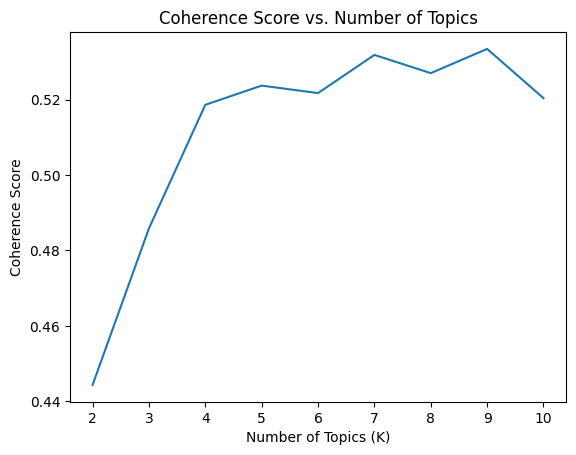

(0, '0.106*"biriyani" + 0.056*"much" + 0.056*"say" + 0.056*"flavours" + 0.056*"pleasant"')
(1, '0.037*"love" + 0.037*"meal" + 0.037*"biriyani" + 0.037*"restaurant" + 0.037*"waiter"')
(2, '0.037*"ambience" + 0.037*"work" + 0.037*"flavours" + 0.037*"restaurent" + 0.037*"need"')
(3, '0.037*"biriyani" + 0.037*"ambience" + 0.037*"meal" + 0.037*"waiter" + 0.037*"love"')
(4, '0.037*"food" + 0.037*"biriyani" + 0.037*"restaurant" + 0.037*"love" + 0.037*"meal"')
(5, '0.037*"biriyani" + 0.037*"love" + 0.037*"meal" + 0.037*"restaurant" + 0.037*"service"')
(6, '0.123*"waited" + 0.123*"hour" + 0.123*"terrible" + 0.123*"rude" + 0.123*"service"')
(7, '0.037*"biriyani" + 0.037*"love" + 0.037*"meal" + 0.037*"waiter" + 0.037*"restaurant"')
(8, '0.139*"inviting" + 0.139*"cozy" + 0.139*"enjoyed" + 0.139*"ambiance" + 0.139*"meal"')
Topic 0:
Keywords: biriyani, much, say, flavours, pleasant

Topic 1:
Keywords: love, meal, biriyani, restaurant, waiter

Topic 2:
Keywords: ambience, work, flavours, restaurent, 

In [64]:
import gensim
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import matplotlib.pyplot as plt

# Preprocess the data
stop_words = set(stopwords.words('english'))
tok_data = [word_tokenize(doc.lower()) for doc in sample_review_data]
tok_data = [[word for word in doc if word.isalnum() and word not in stop_words] for doc in tok_data]

# Create a dictionary and corpus
dictionary = corpora.Dictionary(tok_data)
corpus = [dictionary.doc2bow(doc) for doc in tok_data]

# Determine the optimal number of topics (K)
coherence_scores = []
for k in range(2, 11):  # Try K values from 2 to 10
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k)
    coherence_model = CoherenceModel(model=lda_model, texts=tok_data, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((k, coherence_score))
    print(f"Coherence Score for K={k}: {coherence_score}")

# Choose the K value with the highest coherence score
best_k, best_coherence = max(coherence_scores, key=lambda x: x[1])
print(f"Optimal number of topics (K): {best_k} with coherence score: {best_coherence}")

# Plot the coherence scores
k_values, coherence_scores = zip(*coherence_scores)
plt.plot(k_values, coherence_scores)
plt.xlabel("Number of Topics (K)")
plt.ylabel("Coherence Score")
plt.title("Coherence Score vs. Number of Topics")
plt.show()

# Train the LDA model with the optimal K
lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=best_k)

# Interpret the topics
topics = lda_model.print_topics(num_words=5)
for topic in topics:
    print(topic)
# Interpret the topics
topics = lda_model.print_topics(num_words=5)

for topic_id, topic_words in topics:
    print(f"Topic {topic_id}:")
    words = [word for word, _ in lda_model.show_topic(topic_id, topn=5)]
    topic_definition = ", ".join(words)
    print(f"Keywords: {topic_definition}")
    print()

## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

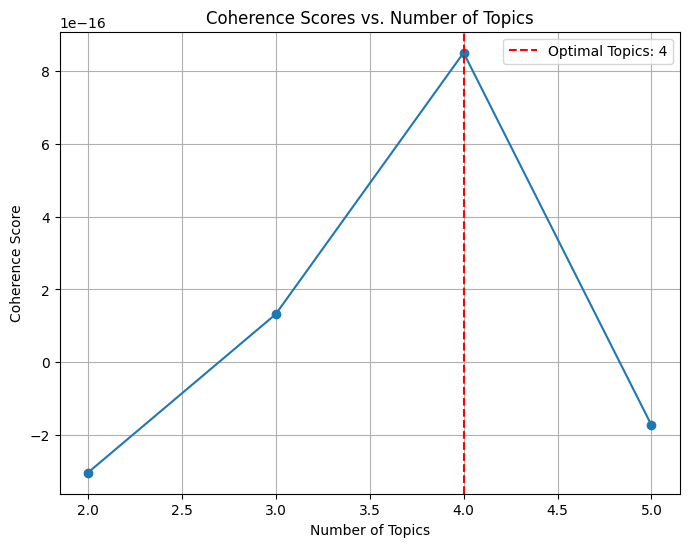

Optimal number of topics: 4
Topic 1: biriyani amazing restaurant food love
Topic 2: work restaurent need pleasant flavours
Topic 3: waiter waited terrible service rude
Topic 4: ambiance cozy enjoyed meal inviting


In [65]:
# Import necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt

# Sample data
sample_review_data= ["The food at this restaurant is amazing! I love the biriyani.",
    "The restaurent ambience is pleasant but need to work on the flavours.",
    "Service was terrible. Waited for an hour and the waiter was rude.",
    "I don't have much to say about this place. It was average. But biriyani was good",
    "The ambiance here is cozy and inviting. I enjoyed my meal.",
]

# Preprocess the text data (you can customize this as needed)
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

# Define a function to preprocess the text
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove punctuation and numbers
    text = ''.join([char for char in text if char.isalpha() or char.isspace()])
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# Preprocess the sample data
preprocessed_data = [preprocess_text(text) for text in sample_review_data]

# Create a document-term matrix using TfidfVectorizer
vectorizer = TfidfVectorizer(max_df=0.85, max_features=50, stop_words='english')
dtm = vectorizer.fit_transform(preprocessed_data)

# Function to calculate coherence score
def calculate_coherence_score(lsa_model, dtm):
    # Calculate the cosine similarity between topic vectors
    topic_similarity = cosine_similarity(lsa_model.components_)

    coherence_score = 0
    for i in range(len(topic_similarity) - 1):
        for j in range(i + 1, len(topic_similarity)):
            # Calculate the cosine similarity between topic vectors i and j
            similarity_score = topic_similarity[i].dot(topic_similarity[j])
            coherence_score += similarity_score

    return coherence_score

# Determine the optimal number of topics based on coherence scores
coherence_scores = []
num_topics_range = range(2, 6)  # You can adjust the range as needed
for num_topics in num_topics_range:
    # Fit LSA
    lsa = TruncatedSVD(n_components=num_topics)
    dtm_lsa = lsa.fit_transform(dtm)

    # Calculate coherence score
    coherence_scores.append(calculate_coherence_score(lsa, dtm_lsa))

# Plot the coherence scores
plt.figure(figsize=(8, 6))
plt.plot(num_topics_range, coherence_scores, marker='o')
plt.title("Coherence Scores vs. Number of Topics")
plt.xlabel("Number of Topics")
plt.ylabel("Coherence Score")
plt.grid(True)

# Determine the optimal number of topics
optimal_num_topics = num_topics_range[coherence_scores.index(max(coherence_scores))]
plt.axvline(x=optimal_num_topics, color='r', linestyle='--', label=f'Optimal Topics: {optimal_num_topics}')
plt.legend()

plt.show()

# Fit LSA with the optimal number of topics
lsa = TruncatedSVD(n_components=optimal_num_topics)
dtm_lsa = lsa.fit_transform(dtm)

# Get the most important words for each topic
terms = vectorizer.get_feature_names_out()
topic_words = []
for i, topic in enumerate(lsa.components_):
    top_words_idx = topic.argsort()[-5:][::-1]
    topic_words.append(' '.join([terms[idx] for idx in top_words_idx]))

# Summarize the topics
print(f"Optimal number of topics: {optimal_num_topics}")
for i, words in enumerate(topic_words):
    print(f"Topic {i+1}: {words}")

## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [58]:
pip install lda2vec


In [66]:
import numpy as np
import spacy
from lda2vec import Corpus
from lda2vec.model import Lda2Vec

# Sample data
sample_data = [
    "The food at this restaurant is amazing! I love the biriyani.",
    "The restaurant ambiance is pleasant but needs to work on the flavors.",
    "Service was terrible. Waited for an hour and the waiter was rude.",
    "I don't have much to say about this place. It was average. But biriyani was good.",
    "The ambiance here is cozy and inviting. I enjoyed my meal."
]

# Tokenize and preprocess the text
nlp = spacy.load('en_core_web_sm')
texts = [nlp(text) for text in sample_data]

# Create a corpus
corpus = Corpus()
corpus.load(texts, max_length=10000)

# Build the Lda2Vec model
model = Lda2Vec(num_unique_tokens=corpus.num_types,
                num_topics=10,
                num_documents=corpus.num_docs,
                embedding_size=256,
                num_sampled=5,
                num_epochs=20)

# Fit the model
model.fit(corpus, num_iters=100)

# Print topics and their top words
topics = model.mixture.topic_vector
top_words = [corpus.word_list[idx] for idx in topics.argsort(axis=1)[:, :-11:-1]]
for i, words in enumerate(top_words):
    print(f"Topic {i + 1}: {', '.join(words)}")


ImportError: ignored

## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [67]:
from bertopic import BERTopic
from sklearn.metrics.pairwise import cosine_similarity
from sentence_transformers import SentenceTransformer

sample_data = [
    "The food at this restaurant is amazing! I love the biriyani.",
    "The restaurant ambiance is pleasant but needs to work on the flavors.",
    "Service was terrible. Waited for an hour, and the waiter was rude.",
    "I don't have much to say about this place. It was average. But biriyani was good.",
    "The ambiance here is cozy and inviting. I enjoyed my meal.",
]

# Preprocess the data (e.g., lowercasing, punctuation removal) if necessary
# You can use the NLTK library for text preprocessing.
# Make sure to install NLTK using `!pip install nltk` if not already installed.

import nltk
nltk.download('punkt')
from nltk.tokenize import word_tokenize
sample_data = [' '.join(word_tokenize(text.lower())) for text in sample_data]

def calculate_coherence(texts, model):
    topic_words, word_scores = model.get_topics()

    embeddings = model._extract_embeddings(texts)

    coherence_values = []

    for i, (topic, words) in enumerate(zip(topic_words, word_scores)):
        topic_embedding = model.reduce_dimensionality(topic)
        similarity_matrix = cosine_similarity(embeddings, topic_embedding)
        coherence_score = sum(similarity_matrix.max(axis=1)) - 1

        coherence_values.append(coherence_score)

    return coherence_values

best_coherence = 0
best_model = None
best_k = 0

for k in range(2, 10):
    model = BERTopic(nr_topics=k)
    topics, _ = model.fit_transform(sample_data)

    coherence_values = calculate_coherence(sample_data, model)
    avg_coherence = sum(coherence_values) / len(coherence_values)

    print(f"Number of topics: {k}, Average Coherence: {avg_coherence}")

    if avg_coherence > best_coherence:
        best_coherence = avg_coherence
        best_model = model
        best_k = k

print(f"Best number of topics: {best_k}, Best Coherence: {best_coherence}")



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


2023-11-06 05:52:08,338 - BERTopic - Transformed documents to Embeddings
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "
2023-11-06 05:52:08,348 - BERTopic - The dimensionality reduction algorithm did not contain the `y` parameter and therefore the `y` parameter was not used
/usr/local/lib/python3.10/dist-packages/scipy/sparse/linalg/_eigen/arpack/arpack.py:1600: RuntimeWarning: k >= N for N * N square matrix. Attempting to use scipy.linalg.eigh instead.
  warnings.warn("k >= N for N * N square matrix. "


TypeError: ignored

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
##Your unique needs and the data you have will determine which subject modeling algorithm is appropriate for you.

##1. The traditional and popular technique known as LDA (Latent Dirichlet Allocation) can produce subjects that are easy to understand, but it may have trouble identifying more intricate patterns in data.



##2. Compared to LDA, LSA (Latent Semantic Analysis) can produce less interpretable subjects, but it is as successful at capturing semantic links.



##3. Lda2vec offers interpretability and the ability to capture intricate topic structures by fusing the advantages of word embeddings and LDA. More data and processing power, though, might be needed.



##4. BERTopic uses BERT embeddings to model topics and works well with a variety of data formats, although it requires a lot of resources and might not be as interpretable as LDA.

##I believe that BERTopic is best


